## Test for some user functions

In [29]:
import torch
from EnsembleFramework import Framework
def user_function(kwargs):
    # print(kwargs["summed_neighbors"])
    print(kwargs["original_features"] + kwargs["summed_neighbors"])
    return kwargs["original_features"] + kwargs["summed_neighbors"] #kwargs["updated_features"] + kwargs["summed_neighbors"]

hops_list = [1]

framework = Framework(["mean" for i in hops_list], 
                     hops_list=hops_list, ## to obtain best for local neighborhood
                     clfs=[],
                     gpu_idx=0,
                     handle_nan=0.0,
                    attention_configs=[None for i in hops_list])
# test_edge_index = torch.tensor([[1,2,3,4,4,5,6,7,7,7,8,8,9],
#                            [0,0,1,1,0,2,3,3,0,4,4,2,5]], dtype=torch.long)
# test_X = torch.tensor([[0,0,0,0], [1,0,0,0],[0,1,0,0], [0,0,1,0], [0,0,0,1], [1,1,0,0], [1,0,1,0], [1,0,0,1], [0,1,1,0], [0,1,0,1]], dtype=torch.float)

test_X = torch.tensor([[0,0,0,0], [1,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1], [1,1,0,0], [1,0,1,0], [1,0,0,1], [0,1,1,0], [0,1,0,1]]).type(torch.float)
test_edge_index = torch.tensor([[9, 8,8,7,7,7,6,5,4,4,3,1,2], [5,2,4,4,0,3,3,2,0,1,1,0,0]])
framework.get_features(test_X, test_edge_index, torch.ones(test_X.shape[0]).type(torch.bool))

[tensor([[0.5000, 0.2500, 0.0000, 0.5000],
         [1.0000, 0.0000, 0.5000, 0.5000],
         [0.5000, 2.0000, 0.5000, 0.0000],
         [1.0000, 0.0000, 1.5000, 0.5000],
         [0.5000, 0.5000, 0.5000, 1.5000],
         [1.0000, 2.0000, 0.0000, 1.0000],
         [1.0000, 0.0000, 1.0000, 0.0000],
         [1.0000, 0.0000, 0.0000, 1.0000],
         [0.0000, 1.0000, 1.0000, 0.0000],
         [0.0000, 1.0000, 0.0000, 1.0000]], device='cuda:0')]

In [2]:
test_X

tensor([[0., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [1., 1., 0., 0.],
        [1., 0., 1., 0.],
        [1., 0., 0., 1.],
        [0., 1., 1., 0.],
        [0., 1., 0., 1.]])

In [3]:
test_edge_index

tensor([[9, 8, 8, 7, 7, 7, 6, 5, 4, 4, 3, 1, 2],
        [5, 2, 4, 4, 0, 3, 3, 2, 0, 1, 1, 0, 0]])

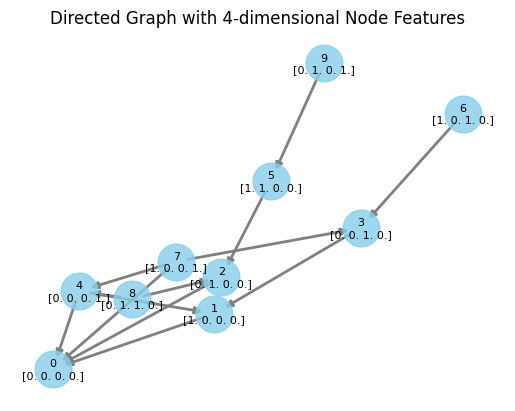

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(feature_matrix, edge_index):
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes with features
    num_nodes = feature_matrix.shape[0]
    for i in range(num_nodes):
        G.add_node(i, features=feature_matrix[i])

    # Add edges using the edge index
    for i in range(edge_index.shape[1]):
        source, target = edge_index[0, i], edge_index[1, i]
        G.add_edge(source, target)

    # Extract positions for visualization
    pos = nx.spring_layout(G)

    # Draw nodes with feature information
    node_labels = {i: f"{i}\n{feature}" for i, feature in enumerate(feature_matrix)}
    nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=700, alpha=0.8)
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8)

    # Draw directed edges with arrows
    nx.draw_networkx_edges(G, pos, edge_color='gray', width=2.0, alpha=1, arrows=True)

    # Display the graph
    plt.title("Directed Graph with 4-dimensional Node Features")
    plt.axis("off")
    plt.show()

draw_graph(test_X.numpy(), test_edge_index.numpy())


In [30]:
import pandas as pd
pd.DataFrame([[0.5000, 0.2500, 0.0000, 0.5000],
         [1.0000, 0.0000, 0.5000, 0.5000],
         [0.5000, 2.0000, 0.5000, 0.0000],
         [1.0000, 0.0000, 1.5000, 0.5000],
         [0.5000, 0.5000, 0.5000, 1.5000],
         [1.0000, 2.0000, 0.0000, 1.0000],
         [1.0000, 0.0000, 1.0000, 0.0000],
         [1.0000, 0.0000, 0.0000, 1.0000],
         [0.0000, 1.0000, 1.0000, 0.0000],
         [0.0000, 1.0000, 0.0000, 1.0000]])

,0,1,2,3
0,0.5,0.25,0.0,0.5
1,1.0,0.00,0.5,0.5
2,0.5,2.00,0.5,0.0
3,1.0,0.00,1.5,0.5
4,0.5,0.50,0.5,1.5
5,1.0,2.00,0.0,1.0
6,1.0,0.00,1.0,0.0
7,1.0,0.00,0.0,1.0
8,0.0,1.00,1.0,0.0
9,0.0,1.00,0.0,1.0
